In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 길이: 365 
앞쪽 5개 값: [[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]]


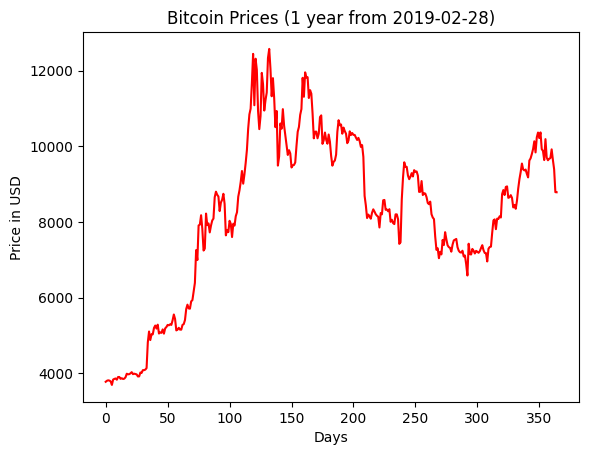

(358, 7, 1) (358, 1)
[[3772.93633533]
 [3799.67854295]
 [3811.61197937]
 [3804.41917011]
 [3782.66410112]
 [3689.86289319]
 [3832.08088473]] [3848.95636968]
[[9631.48494596]
 [9670.85865437]
 [9689.08674285]
 [9919.55144784]
 [9640.46950506]
 [9392.86962872]
 [8787.97836316]] [8784.99535244]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 다운로드한 1년치 비트코인 가격 데이터 읽기
f=open('/content/drive/MyDrive/CodeData/GitHub_Examples/TensorFlow_RNN_LSTM_BTC_USD_2019-02-28_2020-02-27.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함
print('데이터 길이:',len(seq),'\n앞쪽 5개 값:',seq[0:5])

# 그래프로 데이터 확인
plt.plot(seq,color='red')
plt.title('Bitcoin Prices (1 year from 2019-02-28)')
plt.xlabel('Days');plt.ylabel('Price in USD')
plt.show()

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0]); print(X[-1],Y[-1])

Epoch 1/200
250/250 - 2s - loss: 832.7031 - mae: 832.7031 - val_loss: 469.1245 - val_mae: 469.1245 - 2s/epoch - 9ms/step
Epoch 2/200
250/250 - 1s - loss: 553.9149 - mae: 553.9149 - val_loss: 677.4722 - val_mae: 677.4722 - 640ms/epoch - 3ms/step
Epoch 3/200
250/250 - 1s - loss: 501.8912 - mae: 501.8912 - val_loss: 504.8680 - val_mae: 504.8680 - 658ms/epoch - 3ms/step
Epoch 4/200
250/250 - 1s - loss: 505.1360 - mae: 505.1360 - val_loss: 308.4622 - val_mae: 308.4622 - 625ms/epoch - 2ms/step
Epoch 5/200
250/250 - 1s - loss: 514.7286 - mae: 514.7286 - val_loss: 319.1667 - val_mae: 319.1667 - 663ms/epoch - 3ms/step
Epoch 6/200
250/250 - 1s - loss: 504.6579 - mae: 504.6579 - val_loss: 723.0200 - val_mae: 723.0200 - 637ms/epoch - 3ms/step
Epoch 7/200
250/250 - 1s - loss: 500.5706 - mae: 500.5706 - val_loss: 310.8829 - val_mae: 310.8829 - 650ms/epoch - 3ms/step
Epoch 8/200
250/250 - 1s - loss: 491.4262 - mae: 491.4262 - val_loss: 292.8086 - val_mae: 292.8086 - 836ms/epoch - 3ms/step
Epoch 9/200

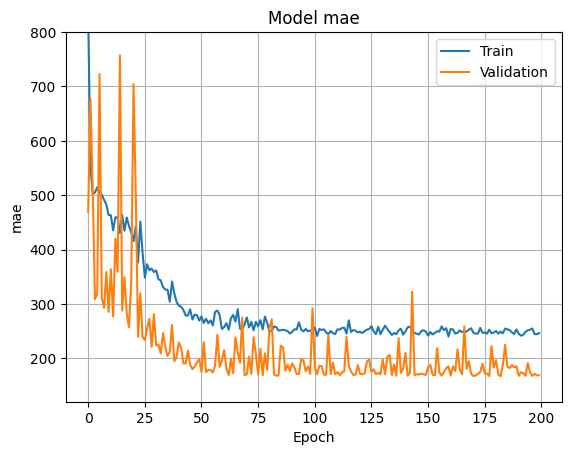

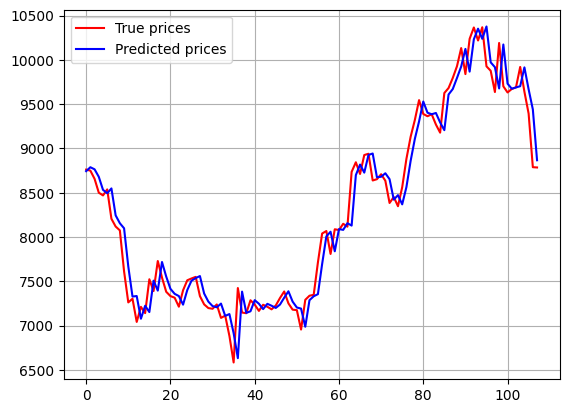

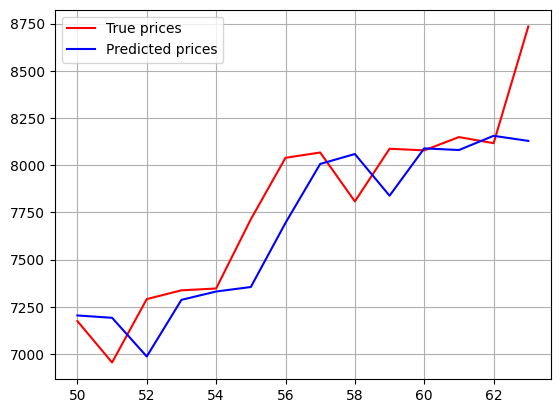

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open('/content/drive/MyDrive/CodeData/GitHub_Example/TensorFlow_RNN_LSTM_BTC_USD_2019-02-28_2020-02-27.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)']].to_numpy() # 종가만 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y=seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test)
print("평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([120,800])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 예측 결과 시각화
x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

# 일부 구간을 확대하여 시각화
x_range=range(50,64)
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range,pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

(358, 7, 4) (358, 4)
[[3772.93633533 3796.63728431 3824.16587937 3666.52401643]
 [3799.67854295 3773.44146075 3879.23118467 3753.80002246]
 [3811.61197937 3799.36702601 3840.04482307 3788.91849833]
 [3804.41917011 3806.69151279 3819.19435612 3759.40921647]
 [3782.66410112 3807.84575592 3818.69548135 3766.24204823]
 [3689.86289319 3783.35506344 3804.35361623 3663.47774336]
 [3832.08088473 3701.04987103 3866.71870424 3688.69715385]] [3848.95636968 3832.59242908 3881.96576977 3802.51605364]
Epoch 1/200
250/250 - 2s - loss: 1044.7998 - mae: 1044.7998 - val_loss: 367.3527 - val_mae: 367.3527 - 2s/epoch - 6ms/step
Epoch 2/200
250/250 - 1s - loss: 538.8985 - mae: 538.8985 - val_loss: 365.8806 - val_mae: 365.8806 - 673ms/epoch - 3ms/step
Epoch 3/200
250/250 - 1s - loss: 500.7684 - mae: 500.7684 - val_loss: 838.2192 - val_mae: 838.2192 - 671ms/epoch - 3ms/step
Epoch 4/200
250/250 - 1s - loss: 481.6866 - mae: 481.6866 - val_loss: 480.6596 - val_mae: 480.6596 - 643ms/epoch - 3ms/step
Epoch 5/200


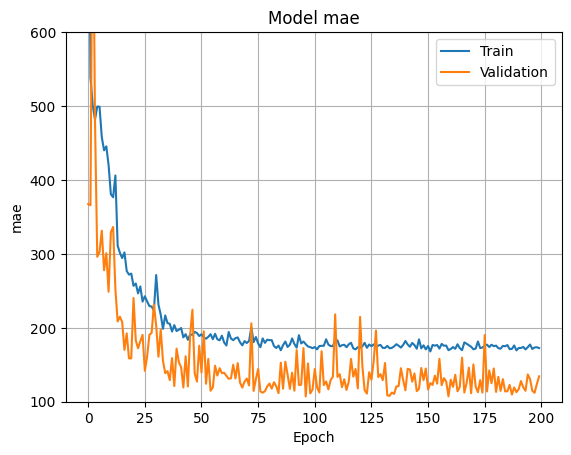

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 코인데스크 사이트에서 1년치 비트코인 가격 데이터 읽기
f=open('/content/drive/MyDrive/CodeData/GitHub_Examples/TensorFlow_RNN_LSTM_BTC_USD_2019-02-28_2020-02-27.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Closing Price (USD)','24h Open (USD)','24h High (USD)','24h Low (USD)']].to_numpy() # 종가, 시가, 고가, 저가를 모두 취함

# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

X,Y = seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 훈련 집합과 테스트 집합으로 분할
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

# LSTM 모델의 설계와 학습
model = Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

# LSTM 모델 평가
ev=model.evaluate(x_test,y_test,verbose=0)
print("손실 함수:",ev[0],"MAE:",ev[1])

# LSTM 모델로 예측 수행
pred=model.predict(x_test) # LSTM
print("LSTM 평균절댓값백분율오차(MAPE):",sum(abs(y_test-pred)/y_test)/len(x_test))

# 학습 곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title('Model mae')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([100,600])
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [ ]:
!pip install music21 # Install the music21 library
# To listen the MIDI file in Google Colab
!apt install fluidsynth # Install fluidsynth MIDI software synthesizer
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./ # Copy the standard soundfont
!fluidsynth -ni FluidR3_GM.sf2 little_star.mid -F little_star.wav # Convert MIDI to WAV

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
0 upgraded, 6 newly installed, 0 to remove and 34 not upgraded.
Need to get 126 MB of archives.
After this operation, 157 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5

In [ ]:
import music21

little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"

s = music21.converter.parse(little_star)

# Save the stream as MIDI file
s.write('midi', 'little_star.mid')

from IPython.display import Audio
Audio('little_star.mid') # Play the WAV file

In [ ]:
import numpy as np

# 계이름과 숫자를 상호 변환하는 표(딕셔너리 자료구조를 사용함)
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
    notes=s.split(' ')[2:]
    seq=[]
    for i in notes:
        seq.append([note2num[i[0]],int(i[1])])
    return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],
 [5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 레이블을 원핫 코드로 변환
def to_onehot(l):
    t=[]
    for i in range(len(l)):
        a=np.zeros(len(onehot))
        a[onehot.index(list(l[i]))]=1.0
        t.append(a)
    return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=8 # 윈도우 크기
h=1 # 수평선 계수

seq=abc2timeseries(little_star)
X,Y=seq2dataset(seq,w,h)
print(X.shape,Y.shape)
print(X[0],Y[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

# 훈련 집합 구축
split=int(len(X)*1.0) # 100%를 훈련집합으로 사용
x_train=X[0:split]; y_train=Y[0:split]
y_train=to_onehot(y_train)

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

# 학습된 모델로 편곡을 하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)
    return timeseries2abc(music)

new_song=arranging_music(model,x_train[0],50)

(34, 8, 2) (34, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]
 [4 4]] [4 4]
Epoch 1/200
34/34 - 1s - loss: 2.8166 - accuracy: 0.0882 - 1s/epoch - 31ms/step
Epoch 2/200
34/34 - 0s - loss: 2.3378 - accuracy: 0.1176 - 86ms/epoch - 3ms/step
Epoch 3/200
34/34 - 0s - loss: 2.0619 - accuracy: 0.2353 - 89ms/epoch - 3ms/step
Epoch 4/200
34/34 - 0s - loss: 2.0707 - accuracy: 0.2353 - 80ms/epoch - 2ms/step
Epoch 5/200
34/34 - 0s - loss: 1.9477 - accuracy: 0.2353 - 79ms/epoch - 2ms/step
Epoch 6/200
34/34 - 0s - loss: 1.8427 - accuracy: 0.2941 - 111ms/epoch - 3ms/step
Epoch 7/200
34/34 - 0s - loss: 1.7142 - accuracy: 0.3824 - 83ms/epoch - 2ms/step
Epoch 8/200
34/34 - 0s - loss: 1.5542 - accuracy: 0.4706 - 94ms/epoch - 3ms/step
Epoch 9/200
34/34 - 0s - loss: 1.4950 - accuracy: 0.4118 - 90ms/epoch - 3ms/step
Epoch 10/200
34/34 - 0s - loss: 1.5443 - accuracy: 0.3529 - 87ms/epoch - 3ms/step
Epoch 11/200
34/34 - 0s - loss: 1.3078 - accuracy: 0.4706 - 84ms/epoch - 2ms/step
Epoch 12/200
34/34 - 0s -

In [ ]:
new_song

'tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4'

In [ ]:
s = music21.converter.parse(new_song)
s.write('midi', 'new_song.mid')
Audio('new_song.mid') # Play the WAV file

In [ ]:
new_new_song=arranging_music(model, [[5,4], [3,4], [3,2], [4,4], [2,4], [2,2], [1,4], [2,4]],50)

1/1 [==============================] - 0s 16ms/step


In [ ]:
new_new_song

'tinynotation: 4/4 g4 e4 e2 f4 d4 d2 c4 d4 g4 g4 a4 f4 g2 f4 e4 d2 e4 d4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4'

In [ ]:
s = music21.converter.parse(new_new_song)
s.write('midi', 'new_new_song.mid')
Audio('new_new_song.mid') # Play the WAV file

In [ ]:
import music21

# "작은 별", "봄나들이", "나비야 나비야" 악보를 ABC 표기로 표현
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"
spring_picnic="tinynotation: 4/8 g8 e8 g8 e8 g8 a8 g4 e8 g8 e8 c8 d8 e8 c4 g8 e8 g8 e8 g8 a8 g4 b8 a8 g8 e8 d8 e8 c4"
butterfly="tinynotation: 2/4 g8 e8 e4 f8 d8 d4 c8 d8 e8 f8 g8 g8 g4 g8 e8 e8 e8 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4 d8 d8 d8 d8 d8 e8 f4 e8 e8 e8 e8 e8 f8 g4 g8 e8 e4 f8 d8 d4 c8 e8 g8 g8 e8 e8 e4"

import numpy as np

# 계이름과 숫자를 상호 변환하는 표
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

# ABC 표기를 시계열 데이터로 변환
def abc2timeseries(s):
    notes=s.split(' ')[2:]
    seq=[]
    for i in notes:
        seq.append([note2num[i[0]],int(i[1])])
    return seq

# 시계열 데이터를 ABC 표기로 변환
def timeseries2abc(t):
    s='tinynotation: 4/4'
    for i in t:
        s=s+' '+num2note[i[0]]+str(i[1])
    return s

# 원핫 코드로 변환하는 표
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]

# 레이블을 원핫 코드로 변환
def to_onehot(l):
    t=[]
    for i in range(len(l)):
        a=np.zeros(len(onehot))
        a[onehot.index(list(l[i]))]=1.0
        t.append(a)
    return np.array(t)

# 시계열 데이터를 훈련 집합으로 자름
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=8 # 윈도우 크기
h=1 # 수평선 계수

# 세 곡을 시계열로 변환하고 결합
seq1=abc2timeseries(little_star)
seq2=abc2timeseries(butterfly)
seq3=abc2timeseries(spring_picnic)
seq=seq1+seq2+seq3

X,Y = seq2dataset(seq,w,h)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

# 훈련 집합 구축
split=int(len(X)*1.0) # 100%를 훈련집합으로 사용
x_train=X[0:split]; y_train=Y[0:split]
y_train=to_onehot(y_train)

# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

# 학습된 모델로 편곡을 하는 함수(first_measure: 첫 소절, duration: 생성될 곡의 길이)
def arranging_music(model,first_measure,duration):
    music=first_measure
    for i in range(duration):
        p=model.predict(np.float32(np.expand_dims(music[-w:],axis=0)))
        music=np.append(music,[onehot[np.argmax(p)]],axis=0)
    return timeseries2abc(music)

Epoch 1/200
116/116 - 1s - loss: 2.6988 - accuracy: 0.1897 - 1s/epoch - 12ms/step
Epoch 2/200
116/116 - 1s - loss: 2.3435 - accuracy: 0.2328 - 576ms/epoch - 5ms/step
Epoch 3/200
116/116 - 0s - loss: 2.1992 - accuracy: 0.2845 - 281ms/epoch - 2ms/step
Epoch 4/200
116/116 - 0s - loss: 2.1386 - accuracy: 0.2759 - 313ms/epoch - 3ms/step
Epoch 5/200
116/116 - 0s - loss: 2.1161 - accuracy: 0.3103 - 286ms/epoch - 2ms/step
Epoch 6/200
116/116 - 0s - loss: 2.0787 - accuracy: 0.2931 - 315ms/epoch - 3ms/step
Epoch 7/200
116/116 - 0s - loss: 2.0128 - accuracy: 0.3362 - 287ms/epoch - 2ms/step
Epoch 8/200
116/116 - 0s - loss: 2.0095 - accuracy: 0.3276 - 284ms/epoch - 2ms/step
Epoch 9/200
116/116 - 0s - loss: 1.9724 - accuracy: 0.3621 - 344ms/epoch - 3ms/step
Epoch 10/200
116/116 - 0s - loss: 1.8836 - accuracy: 0.3190 - 304ms/epoch - 3ms/step
Epoch 11/200
116/116 - 0s - loss: 1.8854 - accuracy: 0.3362 - 297ms/epoch - 3ms/step
Epoch 12/200
116/116 - 0s - loss: 1.8745 - accuracy: 0.3362 - 324ms/epoch - 

In [ ]:
#combined_song=arranging_music(model, [[5,4], [3,4], [3,2], [4,4], [2,4], [2,2], [1,4], [2,4]],50)
combined_song=arranging_music(model,x_train[0],50)

1/1 [==============================] - 0s 83ms/step


In [ ]:
combined_song

'tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4'

In [ ]:
s = music21.converter.parse(combined_song)
s.write('midi', 'combined_song.mid')
Audio('combined_song.mid') # Play the WAV file